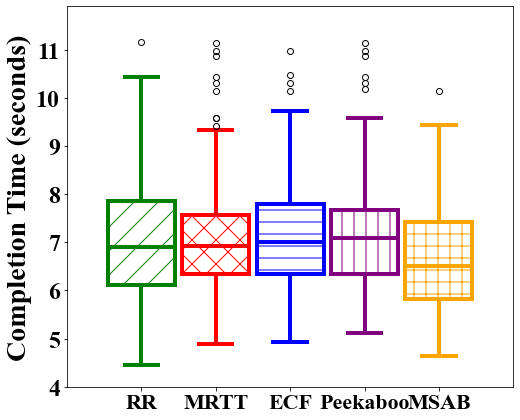

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

import matplotlib
matplotlib.rc('pdf', fonttype=42)

comTime = []
schedulerTypes = [0,1,3,4,5]
topDir = '../results-globecom/'

for j in range(1,301):
    c_time = []
    for i in schedulerTypes:
        dir = 'dynamic1-'+str(j)
        file = open(topDir+dir+'/scheduler'+str(i)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        if (int(last_line.split('\t')[3]) > 5000000):
            c_time.append(float(last_line.split('\t')[0]))
        else:
            c_time.append(0)
    comTime.append(c_time)

dataTotal = pd.DataFrame (comTime, columns = ['RR', 'MRTT', 'ECF', 'PEEK', 'MAB'])

## clean data
toDrop = dataTotal.loc[dataTotal["RR"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["ECF"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["PEEK"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MAB"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)

ct0 = [dataTotal['RR']]
ct1 = [dataTotal['MRTT']]
ct3 = [dataTotal['ECF']]
ct4 = [dataTotal['PEEK']]
ct5 = [dataTotal['MAB']]

bar_width = 0.9

boxprops = dict(linestyle='-', linewidth=4)
whiskerprops = dict(linestyle='-', linewidth=4)
capprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)

plt.figure(figsize=(8,7))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0))),widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*2+0.1*2,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot3['boxes']:
    box.set(hatch = '-', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*3+0.1*3,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot4['boxes']:
    box.set(hatch = '|', fill=False) 
ct_plot5 = plt.boxplot(ct5,positions=np.array(np.arange(len(ct5)))+bar_width*4+0.1*4,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot5['boxes']:
    box.set(hatch = '+', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
    plt.plot([], c=color_code, label=label)

define_box_properties(ct_plot0, 'green', 'RR')
define_box_properties(ct_plot1, 'red', 'MRTT')
define_box_properties(ct_plot3, 'blue', 'ECF')
define_box_properties(ct_plot4, 'purple', 'PEEK')
define_box_properties(ct_plot5, 'orange', 'MAB')
 
# set the x label values
ticks = ['RR', 'MRTT', 'ECF', 'Peekaboo', 'MSAB']
plt.xticks([0,1,2,3,4], ticks)
plt.xticks(fontsize=22, fontweight='bold') 
plt.yticks(fontsize=24, fontweight='bold')
plt.ylabel("Completion Time (seconds)", fontsize=28, fontweight='bold')
plt.xlim(-1, len(ticks))
plt.ylim(4, 11.9)

plt.savefig('./medium_dominate_comTime.pdf', format='pdf')
plt.show()


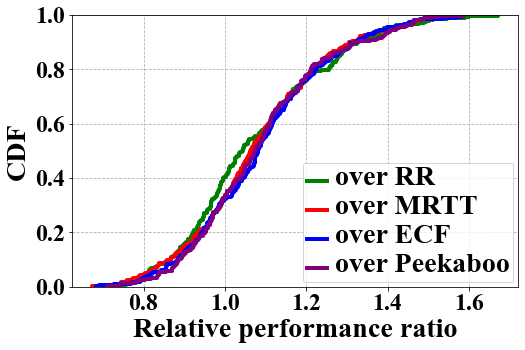

In [3]:

import seaborn as sns

plt.figure(figsize=(8,5))
sns.ecdfplot(data = dataTotal['RR']/dataTotal['MAB'], label = "over RR", color='green', linewidth=4, linestyle="-")
sns.ecdfplot(data = dataTotal['MRTT']/dataTotal['MAB'], label = "over MRTT", color='red', linewidth=4, linestyle="-")
sns.ecdfplot(data = dataTotal['ECF']/dataTotal['MAB'], label = "over ECF", color='blue', linewidth=4, linestyle="-")
sns.ecdfplot(data = dataTotal['PEEK']/dataTotal['MAB'], label = "over Peekaboo", color='purple', linewidth=4, linestyle="-")

plt.legend()
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=28, fontweight='bold')
plt.grid(linestyle="--") 
plt.xticks(fontsize=24, fontweight='bold')
plt.yticks(fontsize=24, fontweight='bold')
plt.xlabel("Relative performance ratio", fontsize=28, fontweight='bold')
plt.ylabel("CDF", fontsize=28, fontweight='bold')
plt.savefig('./medium_dominate_cdf.pdf', format='pdf')
plt.show()
  

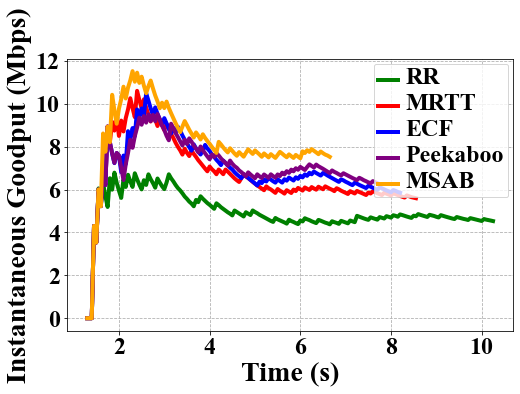

In [4]:
def help(i):
    dir = 'dynamic1-252'
    file = open(topDir+dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open(topDir+dir+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        if (temp[0] == '3' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal


rr = help(0)  
minrtt = help(1)
ecf = help(3)
peek = help(4)
mab = help(5)  

plt.figure(figsize=(8, 5))
plt.grid(linestyle="--")
ax = plt.gca()

plt.plot(rr['Time'], rr['goodput'], color="green", label="RR", linewidth=4)
plt.plot(minrtt['Time'], minrtt['goodput'], color="red", label="MRTT", linewidth=4)
plt.plot(ecf['Time'], ecf['goodput'], color="blue", label="ECF", linewidth=4)
plt.plot(peek['Time'], peek['goodput'], color="purple", label="Peekaboo", linewidth=4)
plt.plot(mab['Time'], mab['goodput'], color="orange", label="MSAB", linewidth=4)

plt.xticks(fontsize=24, fontweight='bold')
plt.yticks(fontsize=24, fontweight='bold')
plt.ylabel("Instantaneous Goodput (Mbps)", fontsize=28, fontweight='bold')
plt.xlabel("Time (s)", fontsize=28, fontweight='bold')

plt.legend(loc=1, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=24, fontweight='bold')

plt.savefig('./medium_dominate_goodput.pdf', format='pdf') 
plt.show()

In [5]:
plt.close()